# Bandits

In [2]:
library(tidyverse)
library(statsr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: BayesFactor
Loading required package: coda
Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand

************
Welcome to BayesFactor 0.9.12-4.2. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************


### Assume:

#### P(M1 is Good)=P(M2 is Bad)=1/2
#### P(M1 is Bad)=P(M2 is Good)=1/2.

# Q: Based on the preceding result, what is the probability that Machine 1 is “Bad” given you won a game playing on Machine 1?

# A: 0.6

# Q: Based on the preceding result, what is the probability that Machine 2 is “Good” given you won a game playing on Machine 1?

# A: 0.4

# Q: Under the Bayesian paradigm, which of the following correctly matches the probabilities with their names?

- Posterior - P(M1 is Good | Win on M1)
Prior - P(M1 is Good)
Likelihood - P(Win on M1 | M1 is Good)


- Posterior - P(M1 is Good | Win on M1)
Prior - P(Win on M1 | M1 is Good)
Likelihood - P(M1 is Good)

- Posterior - P( M_1 | M_1 )
Prior - P(M_1 | M_1)$
Likelihood - P(M1 is Good)


- Posterior - P(Win on M1 | M1 is Good)
Prior - P(M1 is Good)
Likelihood - P(M1 is Good | Win on M1)

# A:
- Posterior - P(M1 is Good | Win on M1) Prior
- P(M1 is Good) Likelihood
- P(Win on M1 | M1 is Good)


In [3]:
bandit_posterior(
    data = data.frame(machine = 1, outcome = "W")
)

m1_good m2_good 
    0.6     0.4

In [4]:
bandit_posterior(data = data.frame(machine = c(1,1), outcome = c("W","L")))

m1_good   m2_good 
0.5294118 0.4705882

In [7]:
# Initiate the two plays on Machine 1
data1 <- data.frame(machine = c(1), outcome = c("W"))
data2 <- data.frame(machine = c(1), outcome = c("L"))

# Use piping and bandit_posterior to calculuate the posterior probabilities after each play
bandit_posterior(data1) %>% 
  bandit_posterior(data2, prior = .)

m1_good   m2_good 
0.5294118 0.4705882

# Q: Use the bandit_posterior function to calculate the posterior probabilities of Machine 1 and 2 being “good” after playing Machine 1 twice and winning both times, and then playing Machine 2 three times with 2 wins then 1 loss.

- P(M1 is good | data)=0.250,  P(M2 is good | data)=0.750

- P(M1 is good | data)=0.429,  P(M2 is good | data)=0.571

- P(M1 is good | data)=0.571,  P(M2 is good | data)=0.429

- P(M1 is good | data)=0.750,  P(M2 is good | data)=0.250

In [9]:
data1 <- data.frame(machine = c(1), outcome = c("W"))
data2 <- data.frame(machine = c(1), outcome = c("W"))
data3 <- data.frame(machine = c(2), outcome = c("W"))
data4 <- data.frame(machine = c(2), outcome = c("L"))
data5 <- data.frame(machine = c(2), outcome = c("W"))

bandit_posterior(data1) %>% 
  bandit_posterior(data2, prior = .) %>% 
  bandit_posterior(data3, prior = .) %>% 
  bandit_posterior(data4, prior = .) %>% 
  bandit_posterior(data5, prior = .)

m1_good   m2_good 
0.5714286 0.4285714

# A:
- P(M1 is good | data)=0.571
- P(M2 is good | data)=0.429

# Q: What would the posterior probabilities be if we had instead played Machine 2 first, playing three times with 2 wins and 1 loss, and then playing Machine 1 twice and winning both times?

In [10]:
data1 <- data.frame(machine = c(2), outcome = c("W"))
data2 <- data.frame(machine = c(2), outcome = c("W"))
data3 <- data.frame(machine = c(2), outcome = c("L"))
data4 <- data.frame(machine = c(1), outcome = c("W"))
data5 <- data.frame(machine = c(1), outcome = c("W"))

bandit_posterior(data1) %>% 
  bandit_posterior(data2, prior = .) %>% 
  bandit_posterior(data3, prior = .) %>% 
  bandit_posterior(data4, prior = .) %>% 
  bandit_posterior(data5, prior = .)

m1_good   m2_good 
0.5714286 0.4285714

# A:
- P(M1 is good | data)=0.571
- P(M2 is good | data)=0.429

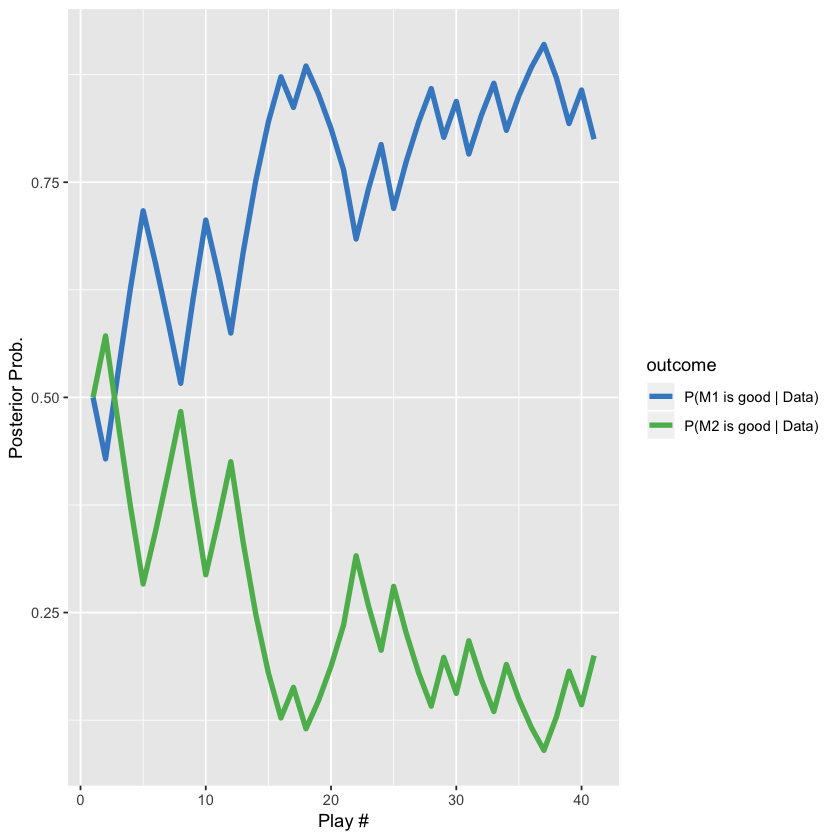

In [11]:
# Store play results for each Machine into `data`
data <- data.frame(machine = c(rep(1, 20), rep(2, 20)),
                  outcome = c("L", "W", "W", "W", "L", "L", "L", "W", "W", "L", 
                              "L", "W", "W", "W", "W", "L", "W", "L", "L", "L", 
                              "W", "L", "L", "W", "L", "L", "L", "W", "L", "W", 
                              "L", "L", "W", "L", "L", "L", "W", "W", "L", "W"))
                              
# Calculate posterior probabilities after each play and plot the result 
plot_bandit_posterior(data)